# Pymaceuticals Inc.
---

### Analysis

- Based on my findings, we see that Capomulin results in a lower average tumor volume compared to the other drugs, along with a lower variance.
- In the last scatterplot, there is a slight postive correlation between weight and average tumor volume, indicating that weight could be a contributing factor to the development of tumor volume.
- Based on the pie chart comparing gender, there is almost the same amount of female mice than male mice. This shows us that we can remove gender as a significant factor for our analysis and its contribution to affecting tumor volume and drug effectiveness.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()
mice_count

249

In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_mice["Mouse ID"].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates()

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = cleaned_df["Mouse ID"].nunique()
mice_count2

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen = cleaned_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_regimen = drug_regimen.set_index("Drug Regimen")

drug_mean = drug_regimen.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = drug_regimen.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_var = drug_regimen.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std = drug_regimen.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = drug_regimen.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                                     "Median Tumor Volume": drug_median,
                                     "Tumor Volume Variance": drug_var,
                                     "Tumor Volume Std. Dev.": drug_std,
                                     "Tumor Volume Str. Err.": drug_sem})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Str. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

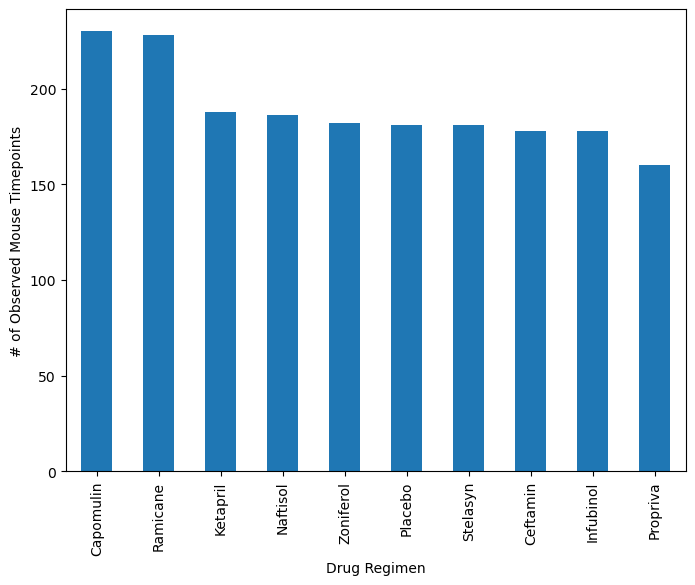

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_bar_chart = cleaned_df[["Drug Regimen", "Mouse ID", "Timepoint"]].set_index("Drug Regimen")
drug_bar_chart2 = drug_bar_chart.groupby("Drug Regimen")["Mouse ID"].count()
drug_bar_chart2 = drug_bar_chart2.reset_index()
drug_bar_sorted = drug_bar_chart2.sort_values(by='Mouse ID', ascending=False)

drug_bar = drug_bar_sorted.plot(kind='bar', x='Drug Regimen', y='Mouse ID', legend=False, figsize=(8,6))
drug_bar.set_ylabel("# of Observed Mouse Timepoints")
drug_bar.set_xlabel("Drug Regimen")

drug_bar

Text(0, 0.5, '# of Observed Mouse Timepoints')

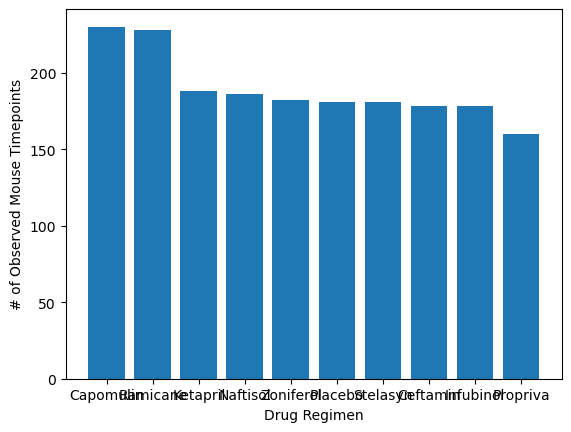

In [139]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_bar = drug_bar_sorted['Drug Regimen']
y_bar = drug_bar_sorted['Mouse ID']

plt.bar(x_bar, y_bar)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

Text(0, 0.5, 'Count')

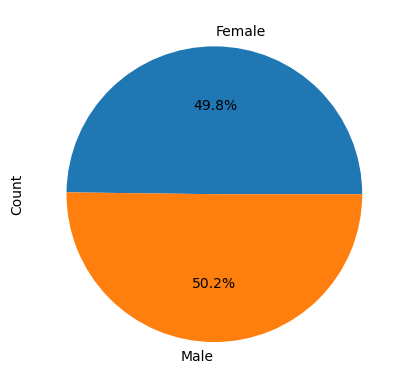

In [144]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = cleaned_df[["Mouse ID", "Sex"]].set_index("Sex")
gender_data_counts_df = gender_data.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart
gender_pie = gender_data_counts_df.plot(kind="pie", y="Mouse ID", autopct='%1.1f%%')
gender_pie.set_ylabel("Count")

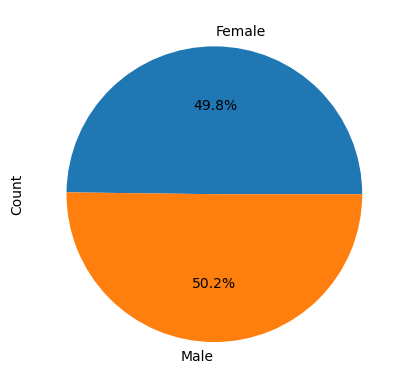

In [149]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
female_mice = cleaned_df[cleaned_df['Sex'] == 'Female']['Mouse ID'].nunique()
male_mice = cleaned_df[cleaned_df['Sex'] == 'Male']['Mouse ID'].nunique()

# Make the pie chart
counts = [female_mice, male_mice]
labels = ['Female', 'Male']

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')
specified_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(specified_treatments)]
final_tumor_volume_df.reset_index()
final_tumor_volume_df.set_index('Drug Regimen')

,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,45,Female,20,23,67.973419,2
Infubinol,a251,45,Female,21,25,65.525743,1
Ceftamin,a275,45,Female,20,28,62.999356,3
Ramicane,a411,45,Male,3,22,38.407618,1
Ramicane,a444,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...
Ceftamin,y769,45,Female,6,27,68.594745,4
Capomulin,y793,45,Male,17,17,31.896238,2
Ceftamin,y865,45,Male,23,26,64.729837,3


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
sorted_df = cleaned_df.sort_values(by='Tumor Volume (mm3)')

for x in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = sorted_df[sorted_df['Drug Regimen'] == x]
    tumor_vols = drug_data.groupby("Mouse ID")["Tumor Volume (mm3)"].last()

    # add subset
    tumor_vol_data.append(tumor_vols)

for i, x in enumerate(treatments):
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data[i].quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    potential_outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]

    print(f"{x}'s potential outliers: {potential_outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


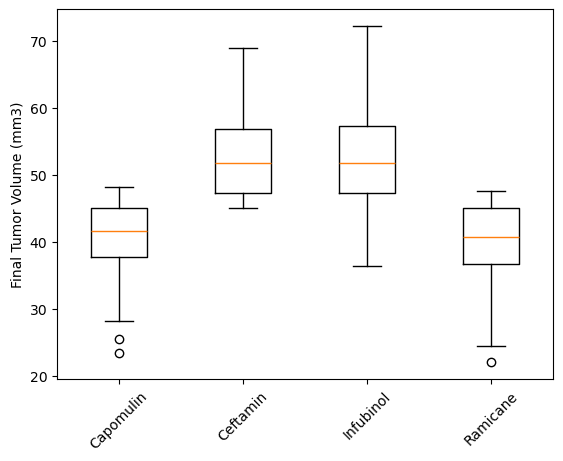

In [120]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments_df = sorted_df[sorted_df['Drug Regimen'].isin(treatments)]
treatments_grouped_df = treatments_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

fig, ax = plt.subplots()
ax.boxplot(treatments_grouped_df.values)
ax.set_xticklabels(treatments_grouped_df.index)
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

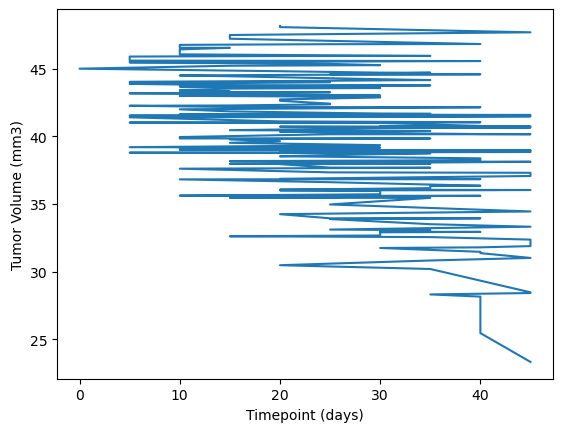

In [133]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = sorted_df[sorted_df['Drug Regimen'] == 'Capomulin']
capomulin_df.set_index('Timepoint')

x = capomulin_df['Timepoint']
y = capomulin_df['Tumor Volume (mm3)']

plt.plot(x,y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

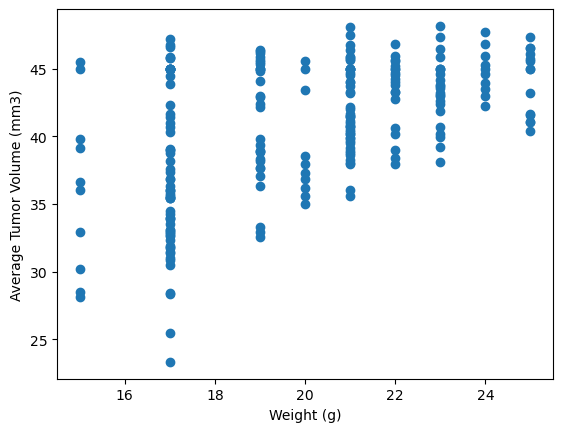

In [138]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_weight = capomulin_df['Weight (g)']
y_weight = capomulin_df['Tumor Volume (mm3)']

plt.scatter(x_weight, y_weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.5256995552077168


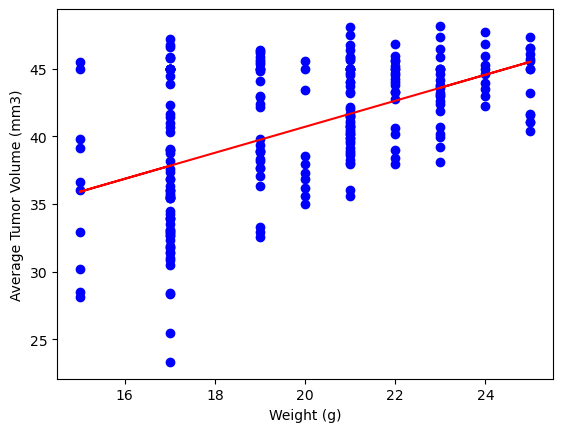

In [137]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr
import numpy as np

correlation_coefficient, _ = pearsonr(x_weight, y_weight)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

slope, intercept = np.polyfit(x_weight, y_weight, 1)

plt.scatter(x_weight, y_weight, color='blue')
plt.plot(x_weight, slope*x_weight + intercept, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
